<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/%ED%98%9C%EC%A0%95/torch_load_final(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

공용폴더에 폴더(yolov5), 파일(model.pt) 업로드해뒀습니다.

In [ ]:
# # 필요한 패키지
# import os
# # 현재 경로 확인
# os.getcwd()
# # 경로 설정
# os.chdir('/content/drive/MyDrive/team2/yolov5')
# %cp -r /content/drive/MyDrive/model.pt /content/drive/MyDrive/team2/yolov5/model.pt

In [1]:
img_path ='/content/drive/MyDrive/team2/preprocessing_done/female/101_F.jpg'
model_path = '/content/drive/MyDrive/team2/yolov5'

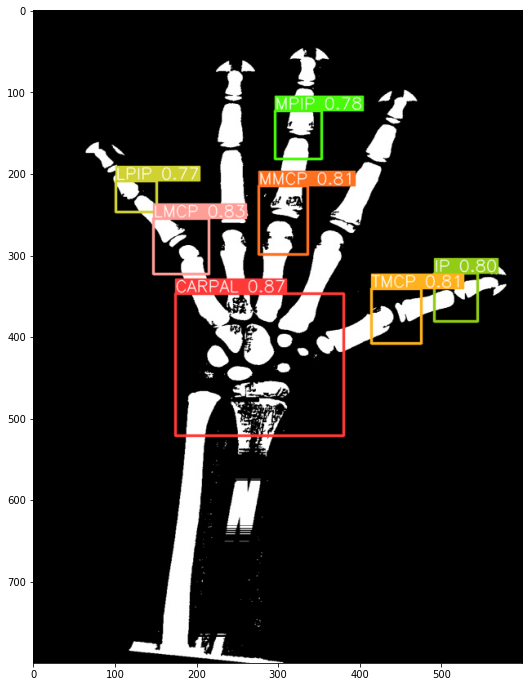

In [3]:
crop = yolo_crop_img(img_path, model_path, result_out=False, show_crop=True)

In [15]:
def yolo_crop_img(img_path, model_path, result_out=False, show_crop=False):
  import os
  os.chdir(model_path)
  import torch
  model = torch.load('./model.pt', map_location='cpu')
  result = model(img_path)
  crops = result.crop(save=False)
  if show_crop: show_img(result)
  if result_out: return result, crops
  return crops

def show_img(result):
  import matplotlib.pyplot as plt
  import numpy as np
  %matplotlib inline
  plt.figure(figsize=(16,12))
  plt.imshow(np.squeeze(result.render()))
  plt.show()

In [26]:
def out_crop_img(crops, gender):
  import re

  for i in range(7):
    carpal = re.compile('CARPAL.')
    ip = re.compile('IP.')
    lmcp = re.compile('LMCP.')
    lpip = re.compile('LPIP.')
    mmcp = re.compile('MMCP.')
    mpip = re.compile('MPIP.')
    tmcp = re.compile('TMCP.')

    if carpal.search(crops[i]['label']):
      CARPAL_img = crops[i]['im']
    if ip.search(crops[i]['label']):
      IP_img = crops[i]['im']
    if lmcp.search(crops[i]['label']):
      LMCP_img = crops[i]['im']
    if lpip.search(crops[i]['label']):
      LPIP_img = crops[i]['im']
    if mmcp.search(crops[i]['label']):
      MMCP_img = crops[i]['im']
    if mpip.search(crops[i]['label']):
      MPIP_img = crops[i]['im']
    if tmcp.search(crops[i]['label']):
      TMCP_img = crops[i]['im']
    else : continue
    print(crops[i]['label'])

    try:
      CARPAL_img = cv2.resize(CARPAL_img, (224,224),cv2.INTER_AREA)
      IP_img = cv2.resize(IP_img, (75,75),cv2.INTER_AREA)
      LMCP_img = cv2.resize(LMCP_img, (75,75),cv2.INTER_AREA)
      LPIP_img = cv2.resize(LPIP_img, (75,75),cv2.INTER_AREA)
      MMCP_img = cv2.resize(MMCP_img, (75,75),cv2.INTER_AREA)
      MPIP_img = cv2.resize(MPIP_img, (75,75),cv2.INTER_AREA)
      TMCP_img = cv2.resize(TMCP_img, (75,75),cv2.INTER_AREA)
    except: continue

    return [CARPAL_img, IP_img, LMCP_img, LPIP_img, MMCP_img, MPIP_img, TMCP_img, gender]

In [22]:
out_crop_img(crop, 1)

UnboundLocalError: ignored

In [46]:

li = []

for i in range(7):
  carpal = re.compile('CARPAL.')
  ip = re.compile('IP.')
  lmcp = re.compile('LMCP.')
  lpip = re.compile('LPIP.')
  mmcp = re.compile('MMCP.')
  mpip = re.compile('MPIP.')
  tmcp = re.compile('TMCP.')
  print(crop[i]['label'])

  if carpal.search(crop[i]['label']):
    CARPAL_img = crop[i]['im']
    CARPAL_img
  if ip.search(crop[i]['label']):
    IP_img = crop[i]['im']
  if lmcp.search(crop[i]['label']):
    LMCP_img = crop[i]['im']
  if lpip.search(crop[i]['label']):
    LPIP_img = crop[i]['im']
  if mmcp.search(crop[i]['label']):
    MMCP_img = crop[i]['im']
  if mpip.search(crop[i]['label']):
    MPIP_img = crop[i]['im']
  if tmcp.search(crop[i]['label']):
    TMCP_img = crop[i]['im']
  else : continue


li.append(CARPAL_img)
li.append(IP_img)
li.append(LMCP_img)
li.append(LPIP_img)
li.append(MMCP_img)
li.append(MPIP_img)
li.append(TMCP_img)

# try:
#   CARPAL_img = cv2.resize(CARPAL_img, (224,224),cv2.INTER_AREA)
#   IP_img = cv2.resize(IP_img, (75,75),cv2.INTER_AREA)
#   LMCP_img = cv2.resize(LMCP_img, (75,75),cv2.INTER_AREA)
#   LPIP_img = cv2.resize(LPIP_img, (75,75),cv2.INTER_AREA)
#   MMCP_img = cv2.resize(MMCP_img, (75,75),cv2.INTER_AREA)
#   MPIP_img = cv2.resize(MPIP_img, (75,75),cv2.INTER_AREA)
#   TMCP_img = cv2.resize(TMCP_img, (75,75),cv2.INTER_AREA)
# except: pass



LPIP 0.77
MPIP 0.78
IP 0.80
TMCP 0.81
MMCP 0.81
LMCP 0.83
CARPAL 0.87


In [50]:
import cv2
# CARPAL_img = cv2.resize(CARPAL_img, (224,224),cv2.INTER_AREA)
CARPAL_img.shape

(224, 224, 3)

In [41]:
ar = [CARPAL_img, IP_img, LMCP_img, LPIP_img, MMCP_img, MPIP_img, TMCP_img]  #gender

In [42]:
ar[0].shape

(187, 220, 3)